# Homework 4: Unsupervised Learning
Andrew Corum, Brendan Mcshane

## Question 1
About a week ago, Brendan and I decided how to split up the work (Brendan takes Q1, I answer Q2). 

On Monday, 4/19, Brendan told me that he was nearly done with Q1. However, I have not heard back from him in the last two days.

I didn't complete Q1 by myself because I was under the impression that Brendan would be able to show me his results today. But it seems I am out of time to work on this.

I might send you (Dr Willimamson and Junyi) an email to see what I should do. If I could have an extra day to work on the homework, then I would be able to answer Q1 myself and turn in a full assignment. Or is there another solution you can think of? I understand if the deadline needs to stay fixed at 4/21 11:59pm. But, if possible, I would like to avoid getting an unnexpected 50% on this assignment.

Sorry for the trouble. This was a very hard issue to forsee since I had communication with Brendan for a while... but then no communication right before the deadline.

## Question 2

In [49]:
import numpy as np
from time import time

# Displaying images
from PIL import Image
from matplotlib.pyplot import imshow

# ML libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

Example label: 7
Example image:


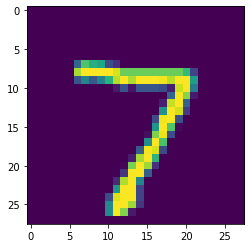

In [50]:
# Function to load IDX formatted MNIST data from file
def load_data(filename, image_data=False):
    data = None
    file = open("./data/" + filename, "rb")
    file.read(4) # Ignore magic number
    N = int.from_bytes(file.read(4), 'big') # Get number of data points
    if image_data:
        R = int.from_bytes(file.read(4), 'big') # Get number of rows
        C = int.from_bytes(file.read(4), 'big') # Get number of columns
        data = np.frombuffer(file.read(N*R*C), dtype=np.uint8)
        data = np.reshape(data, (N,R*C))
    else:
        data = np.frombuffer(file.read(N), dtype=np.uint8)
        data = np.reshape(data, (N))
    file.close()
    return data

# Get MNIST data
train_images = load_data("train-images", True)
train_labels = load_data("train-labels")
test_images = load_data("test-images", True)
test_labels = load_data("test-labels")

# Test that data has been loaded properly
print("Example label: {}".format(test_labels[0]))
print("Example image:")
im = Image.fromarray(test_images[0].reshape(28,28), mode='L')
imshow(im);

In [54]:
# RF, no PCA
# Train RF
clf = RandomForestClassifier(max_depth=None, n_estimators=100, random_state=0)
t_start = time()
clf.fit(train_images, train_labels)
t = time() - t_start
# Test & evaluate RF
labels_pred = clf.predict(test_images)
cfn = confusion_matrix(test_labels, labels_pred)
acc = accuracy_score(test_labels, labels_pred)
dim = test_images[0].size
print("RF, no PCA")
print("  Dimension: {}\n  Time: {}\n  Accuracy: {}".format(dim, t, acc))
print(cfn, "\n")

RF, no PCA
  Dimension: 784
  Time: 34.29003953933716
  Accuracy: 0.9705
[[ 969    0    0    0    0    2    5    1    3    0]
 [   0 1124    2    3    0    2    2    1    1    0]
 [   5    0  999    7    2    0    3    9    7    0]
 [   1    0   10  971    0   10    0    8    8    2]
 [   1    0    1    0  958    0    6    0    2   14]
 [   3    0    0   11    0  862    8    2    4    2]
 [   6    3    0    0    3    4  939    0    3    0]
 [   1    3   20    1    0    0    0  989    3   11]
 [   5    0    5    6    4    9    4    4  928    9]
 [   8    5    1    9    8    3    1    4    4  966]] 



In [48]:
# RF, with PCA, varying explained variance ratio
for ev in [.95, .9, .85]:
    # Apply PCA
    pca = PCA(n_components=ev, svd_solver='full')
    train_pca = pca.fit_transform(train_images)
    # Train RF
    clf = RandomForestClassifier(max_depth=None, n_estimators=100, random_state=0)
    t_start = time()
    clf.fit(train_pca, train_labels)
    t = time() - t_start
    # Test & evaluate RF
    labels_pred = clf.predict(pca.transform(test_images))
    cfn = confusion_matrix(test_labels, labels_pred)
    acc = accuracy_score(test_labels, labels_pred)
    dim = train_pca[0].size
    print("RF, PCA ({} explained variance ratio)".format(ev))
    print("  Dimension: {}\n  Time: {}\n  Accuracy: {}".format(dim, t, acc))
    print(cfn, "\n")

RF, PCA (0.95 explained variance ratio)
  Dimension: 154
  Time: 74.28770208358765
  Accuracy: 0.949
[[ 964    0    1    0    1    2    8    1    3    0]
 [   0 1120    3    4    0    2    4    0    2    0]
 [   8    0  968   12    8    3    3    9   20    1]
 [   2    1    5  956    1   12    2    9   17    5]
 [   1    2    7    2  933    1    9    2    2   23]
 [   2    0    4   30    3  832    8    3    6    4]
 [   8    4    2    0    3    7  933    0    1    0]
 [   1    6   20    2   10    0    0  965    1   23]
 [   6    0   10   18   11   20    4    5  890   10]
 [   6    5    3   14   26    4    0   12   10  929]] 

RF, PCA (0.9 explained variance ratio)
  Dimension: 87
  Time: 54.697843074798584
  Accuracy: 0.9528
[[ 964    0    3    1    1    4    5    1    1    0]
 [   0 1120    1    5    0    1    5    0    2    1]
 [   7    0  973   11    7    0    3    9   22    0]
 [   3    0    8  954    1   16    0    9   15    4]
 [   0    1    5    1  938    3    7    1    2   24]


PCA reduces the dimension of our data. The input MNIST data contains 28x28 pixel images, so the dimension is 28x28 = 784. This is a very large number of features to include in a model, so it makes sense to use PCA to try to reduce the number of features.

With 95% explained variance ratio (EVR), the PCA-reduced data has 154 dimensions. Then reducing further, 90% EVR gives 87 dimensions and 85% EVR reduces to 59 dimensions. Higher EVR means that the PCA-reduced dataset accounts for more of the variance within the original data. But when allowing for lower EVR, we are able to reduce the input dimension even more.

Lowering the dimension of the input initially increases random forest (RF) training time. To train on all 60,000 images, it took ~35 seconds. But the initial reduction to 154 dimensions increased training time to ~74 seconds. This is likely because the PCA-reduced data is much less sparce than the original data. Remember, the MNIST data contains handwritten digits, so most of the features take value = 0 (white space). But PCA reduces a lot of these unnecessary features. However, among the PCA-reduced data, the further we reduce the dimension, the further we lower the RF training time.

Comparing the No-PCA RF model to the 95%-PCA model, we see that the accuracy drops (97.1% to 94.9%). This is not surprising, as we lose a lot of information when the dimension of the data drops from 784 to 154. However, comparing the PCA models, we actually see an increase in accuracy as the EVR drops. Among the models trained on PCA-reduced data, the 85% EVR result performs best (95.5% accuracy). This can be explaind by the curse of dimensionality, which says that patterns in data often do not appear (or are harding to find) in higher dimensions. 

**Results:**

| **PCA EVR**|**Dim**|**Time**|**Accuracy**|
|------------|-----|------|----------|
| N/A (1.00) | 784 | 34.3 | 0.971    |
| 0.95       | 154 | 74.3 | 0.949    |
| 0.90       | 87  | 54.7 | 0.953    |
| 0.85       | 59  | 42.9 | 0.955    |

## Resources
* MNIST dataset: https://deepai.org/dataset/mnist
* Reading buffers to numpy arrays: https://stackoverflow.com/questions/47637758/how-can-i-make-a-numpy-ndarray-from-bytes
* Jupyter images: https://stackoverflow.com/questions/26649716/how-to-show-pil-image-in-ipython-notebook
* Pillow docs: https://pillow.readthedocs.io/en/stable/reference/Image.html
* sklearn RF: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* sklearn confusion matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
* sklearn PCA: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
* sklearn score https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html